<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>Exercise 1: Introduction to AIdea AOI </h1></td>
    </tr>
  </tbody>
</table>


# AU AI Summer Programs 2020
* This tutorial uses the AOI dataset of the AIdea platform.
* Introduce how to write deep learning programs to classify defects in automatic optical inspection.
* This notebook program can be executed in the cloud using Google Colab or Jupyter on a personal computer.

AUAI Summer AOI Project
https://aidea-web.tw/topic/a49e3f76-69c9-4a4a-bcfc-c882840b3f27

Pro.Hsueh-Ting Chu EMAIL: htchu.taiwan@gmail.com  FB: https://www.facebook.com/htchu.taiwan

# Exercise 1: AIdea AOI & TensorFlow
* AIdea AOI project
* TensorFlow 2.0

# (A) AIdea dataset


## Step 1: Load the AIdea AOI dataset from google drive

In [ ]:
from google_drive_downloader import GoogleDriveDownloader
#GoogleDriveDownloader.download_file_from_google_drive(file_id='1N70KyhVsQZU2iiK19xlJubw0afQ2EMu5',dest_path='./content', unzip=True)
GoogleDriveDownloader.download_file_from_google_drive(file_id='1tovCO2gsjesjJ8OsfHgahyt-buY34dk0',dest_path='./content', unzip=True)

Unzipping...Done.


## Step 2: read the training set

In [ ]:
import pandas as pd
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(2528, 2)


In [ ]:
df_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


## Step 3: Build the lists of training images and labels from the dataframe

In [ ]:
#limit the amount of training images for the class process
#train_num = 480
train_num = df_train.shape[0]
if train_num >= df_train.shape[0]:
  train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values
print(train_labels[:10])

[0 1 1 5 5 5 3 0 3 5]


## Step 4: read images of the training set

In [ ]:
train_path ="train_images/"
train_images = []
from tensorflow.keras.preprocessing import image
for file in train_files:
    img = image.load_img(train_path+file, color_mode="rgb", target_size = (299, 299))
    train_images.append(img)
    if len(train_images)%100 == 0:
      print('.', end='')
print(len(train_images))

.........................2528


## Step 5: show AOI images of the classes: 
0 (normal), 1 (void), 2 (horizontal  defect) 3 (vertical defect), 4 (edge defect), 5 (particle)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

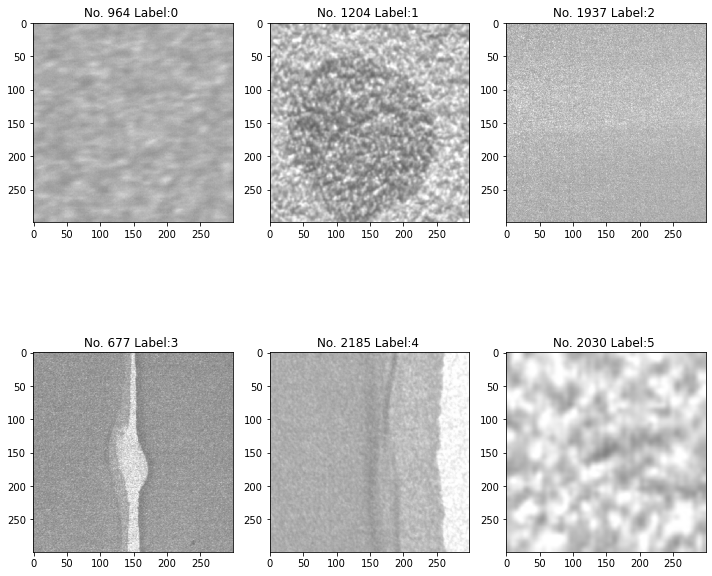

In [ ]:
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        curclass += 1
        curclass %= 6
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

In [ ]:
# Class 0-normal
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

In [ ]:
# Class 1-void
import random
curclass = 1
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

In [ ]:
# Class 2-horizontal defect
import random
curclass = 2
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

In [ ]:
# Class 3-vertical defect
import random
curclass = 3
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

In [ ]:
# Class 4-edge defect
import random
curclass = 4
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

In [ ]:
# Class 5-particle
import random
curclass = 5
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

## Step 6: Show statistics of training images in the 6 classes

In [ ]:
import numpy as np
labels, counts = np.unique(train_labels, return_counts=True)
print(labels, counts)

[0 1 2 3 4 5] [674 492 100 378 240 644]


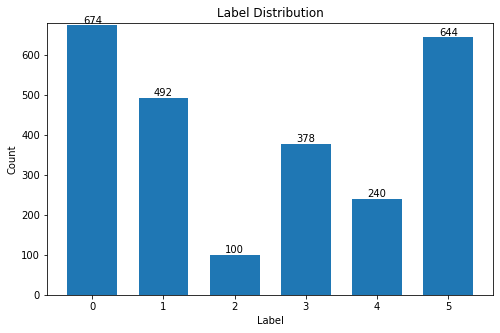

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.bar(labels, counts, width=0.7, align='center')
plt.title("Label Distribution")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.ylim(0, 680)

for a, b in zip(labels, counts):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
plt.show()

# (B) TensorFlow 2.0 Keras applications with ImageNet models

In [ ]:
!nvidia-smi

## Step 7: Keras Applications Models
<img src="https://miro.medium.com/max/1571/1*XB4SlSGxGKFQbIBoil0aDg.png" alt="Pre-train models" width="500">

Pre-train models of tf.Keras includes Xception、VGG16、VGG19、ResNet50、InceptionV3、InceptionResNetV2、MobileNet、DenseNet、NASNet、MobileNetV2
<img src="https://miro.medium.com/max/1280/0*L8egayRvFZOAmvqc.png" alt="Pre-train models" width="500">

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
model = InceptionV3(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
model = Xception(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications.nasnet import preprocess_input
model = NASNetLarge(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
model = InceptionResNetV2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
model = MobileNetV2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
model = ResNet50V2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

## Step 8: Keras Applications preprocess_input

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
x = image.img_to_array(train_images[0])
img_array = preprocess_input(x, mode = 'tf' )
print(img_array[0 , 0 , 0])


0.3411765


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
x = image.img_to_array(train_images[0])
img_array = preprocess_input(x, mode = 'torch' )
print(img_array[0 , 0 , 0])

0.810429


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
x = image.img_to_array(train_images[0])
img_array = preprocess_input(x, mode = 'caffe' )
print(img_array[0 , 0 , 0])

67.061


## Step 9: Tranfer learning
<img src="https://cdn-images-1.medium.com/max/1000/1*frBNwuPg0kUsWFqfBlvxLg.png" alt="Pre-train models" width="500">


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [ ]:
#the InceptionV3 model 
num_classes = 6
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(include_top = False, input_shape=(299,299,3), weights='imagenet', classes=num_classes)
base_model.summary()

In [ ]:
base_model.trainable = False
last_layer = base_model.output
last_layer=Flatten()(last_layer)
last_layer=Dropout(0.3)(last_layer)
out = Dense(num_classes, activation='softmax', name='softmax')(last_layer)
custom_model = Model(base_model.input, out)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 12294     
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________
